In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 150

In [3]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession

In [4]:
requests_cache.CachedSession

requests_cache.session.CachedSession

In [5]:
requests_cache.CachedSession()

<CachedSession(cache=<SQLiteCache(name=http_cache)>, expire_after=-1, urls_expire_after=None, allowable_codes=(200,), allowable_methods=('GET', 'HEAD'), stale_if_error=False, cache_control=False)>

# Calculate daily returns for the S&P 100 stocks. 
Use all the stocks listed here: https://en.wikipedia.org/wiki/S%26P_100#Components

In [6]:
# extract table of stocks from Wikipedia provided
sp_100_companies = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100#Components')
sp_100_companies = sp_100_companies[2]
sp_100_companies

,Symbol,Name,Sector
0,AAPL,Apple,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe,Information Technology
...,...,...,...
96,VZ,Verizon,Communication Services
97,WBA,Walgreens Boots Alliance,Consumer Staples
98,WFC,Wells Fargo,Financials
99,WMT,Walmart,Consumer Staples


In [7]:
# replace BRK.B with BRK-B
sp_100_companies.iloc[18].loc['Symbol'] = 'BRK-B'

In [8]:
# create list of stocks to download
stocks = list(sp_100_companies.loc[:, 'Symbol'])

# request past daily stock prices
yf_data = yf.download(stocks, start='2020-01-01', end='2022-08-31', session=session)
yf_data = pd.DataFrame(yf_data)
yf_data.head()

[                       0%                       ]

[*                      3%                       ]  3 of 101 completed

[**                     4%                       ]  4 of 101 completed

[**                     5%                       ]  5 of 101 completed

[**                     5%                       ]  5 of 101 completed

[*****                 10%                       ]  10 of 101 completed

[******                12%                       ]  12 of 101 completed

[*******               15%                       ]  15 of 101 completed

[********              16%                       ]  16 of 101 completed

[********              16%                       ]  16 of 101 completed

[*********             18%                       ]  18 of 101 completed

[*********             19%                       ]  19 of 101 completed

[**********            20%                       ]  20 of 101 completed

[**********            21%                       ]  21 of 101 completed

[***********           22%                       ]  22 of 101 completed

[*************         28%                       ]  28 of 101 completed

[***************       31%                       ]  31 of 101 completed

[***************       32%                       ]  32 of 101 completed

[****************      33%                       ]  33 of 101 completed

[****************      34%                       ]  34 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[******************    38%                       ]  38 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[*******************   40%                       ]  40 of 101 completed

[********************  42%                       ]  42 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[**********************46%                       ]  46 of 101 completed

[**********************47%                       ]  47 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************49%                       ]  49 of 101 completed

[**********************50%                       ]  50 of 101 completed

[**********************50%                       ]  51 of 101 completed

[**********************51%                       ]  52 of 101 completed

[**********************52%                       ]  53 of 101 completed

[**********************53%                       ]  54 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************55%*                      ]  56 of 101 completed

[**********************56%**                     ]  57 of 101 completed

[**********************59%***                    ]  60 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************62%*****                  ]  63 of 101 completed

[**********************63%*****                  ]  64 of 101 completed

[**********************64%******                 ]  65 of 101 completed

[**********************65%******                 ]  66 of 101 completed

[**********************66%*******                ]  67 of 101 completed

[**********************67%*******                ]  68 of 101 completed

[**********************68%********               ]  69 of 101 completed

[**********************70%*********              ]  71 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************72%**********             ]  73 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************76%***********            ]  77 of 101 completed

[**********************77%************           ]  78 of 101 completed

[**********************77%************           ]  78 of 101 completed

[**********************80%*************          ]  81 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************82%**************         ]  83 of 101 completed

[**********************83%***************        ]  84 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************87%*****************      ]  88 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************91%*******************    ]  92 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************94%********************   ]  95 of 101 completed

[**********************96%*********************  ]  97 of 101 completed

[**********************97%********************** ]  98 of 101 completed

[**********************98%********************** ]  99 of 101 completed

[**********************99%***********************]  100 of 101 completed

[*********************100%***********************]  101 of 101 completed

Adj Close                                                    \
                AAPL    ABBV     ABT      ACN     ADBE     AIG     AMD   
Date                                                                     
2020-01-02   73.6836 77.9326 82.9062 201.5547 334.4300 47.5863 49.1000   
2020-01-03   72.9672 77.1929 81.8956 201.2190 331.8100 47.2186 48.6000   
2020-01-06   73.5486 77.8021 82.3246 199.9051 333.7100 47.2554 48.3900   
2020-01-07   73.2027 77.3582 81.8670 195.5891 333.3900 46.9887 48.2500   
2020-01-08   74.3803 77.9065 82.2007 195.9728 337.8700 47.5404 47.8300   

                                      ...       Volume               \
               AMGN      AMT    AMZN  ...          UNH          UNP   
Date                                  ...                             
2020-01-02 221.2049 215.8704 94.9005  ... 2543400.0000 2444800.0000   
2020-01-03 219.7032 215.9743 93.7485  ... 2711400.0000 2344200.0000   
2020-01-06 221.3892 215.9176 95.1440  ... 3079100.0000 3142500.0000   
2020-01-07 219.3070 211.3168 95.3430  ... 2492900.0000 4096400.0000   
2020-01-08 219.4728 213.1496 94.5985  ... 3379200.0000 2817500.0000   

                                                                  \
                    UPS          USB             V            VZ   
Date                                                               
2020-01-02 4158100.0000 5002100.0000  8733000.0000 11447900.0000   
2020-01-03 2477800.0000 5161800.0000  4899700.0000 13263200.0000   
2020-01-06 3381600.0000 6869200.0000 10109500.0000 15094500.0000   
2020-01-07 1952300.0000 4006800.0000  4392300.0000 14293100.0000   
2020-01-08 2016000.0000 5627500.0000  5712000.0000 15926500.0000   

                                                                   
                     WBA           WFC          WMT           XOM  
Date                                                               
2020-01-02  5700500.0000 16803100.0000 6764900.0000 12456400.0000  
2020-01-03  4892300.0000 15608800.0000 5399200.0000 17386900.0000  
2020-01-06  6003300.0000 13200300.0000 6445500.0000 20081900.0000  
2020-01-07  4365700.0000 13278600.0000 6846900.0000 17387700.0000  
2020-01-08 17431800.0000 16585600.0000 5875800.0000 15137700.0000  

[5 rows x 606 columns]

In [9]:
yf_data = yf.download(stocks, start='2020-01-01', end='2022-08-31', session=session)


[                       0%                       ]

[*                      2%                       ]  2 of 101 completed

[*                      3%                       ]  3 of 101 completed

[**                     4%                       ]  4 of 101 completed

[**                     5%                       ]  5 of 101 completed

[***                    6%                       ]  6 of 101 completed

[***                    7%                       ]  7 of 101 completed

[****                   8%                       ]  8 of 101 completed

[****                   9%                       ]  9 of 101 completed

[*****                 10%                       ]  10 of 101 completed

[*****                 11%                       ]  11 of 101 completed

[******                12%                       ]  12 of 101 completed

[*******               15%                       ]  15 of 101 completed

[********              16%                       ]  16 of 101 completed

[********              17%                       ]  17 of 101 completed

[*********             18%                       ]  18 of 101 completed

[*********             19%                       ]  19 of 101 completed

[**********            20%                       ]  20 of 101 completed

[**********            21%                       ]  21 of 101 completed

[***********           22%                       ]  22 of 101 completed

[***********           23%                       ]  23 of 101 completed

[************          24%                       ]  24 of 101 completed

[************          24%                       ]  24 of 101 completed

[*************         27%                       ]  27 of 101 completed

[**************        29%                       ]  29 of 101 completed

[***************       31%                       ]  31 of 101 completed

[***************       32%                       ]  32 of 101 completed

[***************       32%                       ]  32 of 101 completed

[****************      34%                       ]  34 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[*****************     36%                       ]  36 of 101 completed

[******************    37%                       ]  37 of 101 completed

[******************    38%                       ]  38 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[*******************   40%                       ]  40 of 101 completed

[********************  41%                       ]  41 of 101 completed

[********************  42%                       ]  42 of 101 completed

[********************* 43%                       ]  43 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[**********************46%                       ]  46 of 101 completed

[**********************47%                       ]  47 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************49%                       ]  49 of 101 completed

[**********************50%                       ]  50 of 101 completed

[**********************50%                       ]  51 of 101 completed

[**********************51%                       ]  52 of 101 completed

[**********************52%                       ]  53 of 101 completed

[**********************53%                       ]  54 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************55%*                      ]  56 of 101 completed

[**********************56%**                     ]  57 of 101 completed

[**********************56%**                     ]  57 of 101 completed

[**********************58%***                    ]  59 of 101 completed

[**********************59%***                    ]  60 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************62%*****                  ]  63 of 101 completed

[**********************65%******                 ]  66 of 101 completed

[**********************66%*******                ]  67 of 101 completed

[**********************67%*******                ]  68 of 101 completed

[**********************68%********               ]  69 of 101 completed

[**********************69%********               ]  70 of 101 completed

[**********************70%*********              ]  71 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************72%**********             ]  73 of 101 completed

[**********************72%**********             ]  73 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************75%***********            ]  76 of 101 completed

[**********************76%***********            ]  77 of 101 completed

[**********************77%************           ]  78 of 101 completed

[**********************79%*************          ]  80 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************82%**************         ]  83 of 101 completed

[**********************83%***************        ]  84 of 101 completed

[**********************84%***************        ]  85 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************86%****************       ]  87 of 101 completed

[**********************87%*****************      ]  88 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************89%******************     ]  90 of 101 completed

[**********************90%******************     ]  91 of 101 completed

[**********************91%*******************    ]  92 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************94%********************   ]  95 of 101 completed

[**********************95%*********************  ]  96 of 101 completed

[**********************96%*********************  ]  97 of 101 completed

[**********************97%********************** ]  98 of 101 completed

[**********************98%********************** ]  99 of 101 completed

[**********************99%***********************]  100 of 101 completed

[*********************100%***********************]  101 of 101 completed

In [10]:
yf_data

Adj Close                                                      \
                AAPL     ABBV      ABT      ACN     ADBE     AIG     AMD   
Date                                                                       
2020-01-02   73.6836  77.9326  82.9062 201.5547 334.4300 47.5863 49.1000   
2020-01-03   72.9672  77.1929  81.8956 201.2190 331.8100 47.2186 48.6000   
2020-01-06   73.5486  77.8021  82.3246 199.9051 333.7100 47.2554 48.3900   
2020-01-07   73.2027  77.3582  81.8670 195.5891 333.3900 46.9887 48.2500   
2020-01-08   74.3803  77.9065  82.2007 195.9728 337.8700 47.5404 47.8300   
...              ...      ...      ...      ...      ...     ...     ...   
2022-08-25  170.0300 137.9265 105.3927 308.3986 403.9300 54.9337 97.1800   
2022-08-26  163.6200 134.9766 101.4215 296.8101 381.0200 52.6871 91.1800   
2022-08-29  161.3800 134.3430 101.3617 293.8333 375.2600 52.4883 88.4900   
2022-08-30  158.9100 134.1846 101.7200 291.2050 375.0700 52.0807 86.9400   
2022-08-31       NaN      NaN      NaN      NaN      NaN     NaN     NaN   

                                       ...       Volume               \
               AMGN      AMT     AMZN  ...          UNH          UNP   
Date                                   ...                             
2020-01-02 221.2049 215.8704  94.9005  ... 2543400.0000 2444800.0000   
2020-01-03 219.7032 215.9743  93.7485  ... 2711400.0000 2344200.0000   
2020-01-06 221.3891 215.9176  95.1440  ... 3079100.0000 3142500.0000   
2020-01-07 219.3070 211.3168  95.3430  ... 2492900.0000 4096400.0000   
2020-01-08 219.4729 213.1496  94.5985  ... 3379200.0000 2817500.0000   
...             ...      ...      ...  ...          ...          ...   
2022-08-25 245.6800 266.2982 137.2800  ... 1965800.0000 1624100.0000   
2022-08-26 240.6500 259.2993 130.7500  ... 1906700.0000 1728800.0000   
2022-08-29 239.3800 257.8399 129.7900  ... 1594000.0000 2139900.0000   
2022-08-30 239.1200 251.5657 128.7300  ... 2013400.0000 3159400.0000   
2022-08-31      NaN      NaN      NaN  ...          NaN          NaN   

                                                                  \
                    UPS          USB             V            VZ   
Date                                                               
2020-01-02 4158100.0000 5002100.0000  8733000.0000 11447900.0000   
2020-01-03 2477800.0000 5161800.0000  4899700.0000 13263200.0000   
2020-01-06 3381600.0000 6869200.0000 10109500.0000 15094500.0000   
2020-01-07 1952300.0000 4006800.0000  4392300.0000 14293100.0000   
2020-01-08 2016000.0000 5627500.0000  5712000.0000 15926500.0000   
...                 ...          ...           ...           ...   
2022-08-25 1984400.0000 5296700.0000  4495000.0000 14327600.0000   
2022-08-26 2203900.0000 5070200.0000  5060200.0000 16795700.0000   
2022-08-29 1928000.0000 3650000.0000  4476200.0000 15039500.0000   
2022-08-30 2238000.0000 5105500.0000  3918200.0000 20705100.0000   
2022-08-31          NaN          NaN           NaN           NaN   

                                                                   
                     WBA           WFC          WMT           XOM  
Date                                                               
2020-01-02  5700500.0000 16803100.0000 6764900.0000 12456400.0000  
2020-01-03  4892300.0000 15608800.0000 5399200.0000 17386900.0000  
2020-01-06  6003300.0000 13200300.0000 6445500.0000 20081900.0000  
2020-01-07  4365700.0000 13278600.0000 6846900.0000 17387700.0000  
2020-01-08 17431800.0000 16585600.0000 5875800.0000 15137700.0000  
...                  ...           ...          ...           ...  
2022-08-25  6433300.0000 11783200.0000 6471500.0000 15305700.0000  
2022-08-26  6927600.0000 13405200.0000 7110600.0000 15531400.0000  
2022-08-29  5316400.0000 12504900.0000 5793900.0000 23059200.0000  
2022-08-30  6668800.0000 14365000.0000 4822700.0000 17086800.0000  
2022-08-31           NaN           NaN          NaN           NaN  

[672 rows x 606 columns]

In [11]:
# make list of stocks for future reference
stocks = list()

for tuple in yf_data.keys()[:101]:
    stocks.append(tuple[1])

In [12]:
# define function that calculates a daily return for a single stock across an open and a close - all resulting values are in %
def daily_return(open, close):
    return (close - open) / open * 100

In [13]:
# define function that calculates average daily returns of a single stock - all resulting values are in %
def avg_return(stock, data = yf_data):
    # get all adj close values for the provided stock
    stock_adj_close = data[('Adj Close', stock)]
    # iterate through each day except for the last day
    all_days_returns = list()
    for index, day in enumerate(stock_adj_close.values[:-1]):
        all_days_returns.append(daily_return(day, stock_adj_close[index + 1]))
    return all_days_returns

In [14]:
# create data frame of each stock's daily returns
def calculate_daily_returns(stocks=stocks):
    df = pd.DataFrame()
    for stock in stocks:
        df[stock] = avg_return(stock)
    return df

In [15]:
# calculate and display dataframe of each stocks daily returns
df_daily_returns = calculate_daily_returns()
df_daily_returns['Date'] = yf_data.index[:-1]
df_daily_returns = df_daily_returns.set_index('Date')
df_daily_returns.head()

/tmp/ipykernel_7993/1908975407.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[stock] = avg_return(stock)
/tmp/ipykernel_7993/3612013804.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_daily_returns['Date'] = yf_data.index[:-1]


,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.9722,-0.9492,-1.2191,-0.1665,-0.7834,-0.7728,-1.0183,-0.6789,0.0481,-1.2139,...,-1.0120,-0.7077,-0.0599,-1.1655,-0.7953,-1.0647,0.0000,-0.6140,-0.8828,-0.8039
2020-01-03,0.7968,0.7892,0.5239,-0.6530,0.5726,0.0779,-0.4321,0.7674,-0.0262,1.4886,...,0.6942,-0.8564,-0.4455,-1.3673,-0.2163,-0.2152,0.8632,-0.5990,-0.2036,0.7678
2020-01-06,-0.4703,-0.5705,-0.5559,-2.1590,-0.0959,-0.5642,-0.2893,-0.9405,-2.1308,0.2092,...,-0.6037,-0.7580,-0.1721,-0.9530,-0.2643,-1.1117,-0.5034,-0.8286,-0.9265,-0.8184
2020-01-07,1.6086,0.7087,0.4076,0.1961,1.3438,1.1739,-0.8705,0.0756,0.8673,-0.7809,...,2.1084,1.0951,0.5690,-0.2099,1.7118,0.1845,-5.8357,0.3038,-0.3432,-1.5080
2020-01-08,2.1241,0.7708,0.2668,0.8907,0.7636,1.1023,2.3834,0.2980,0.3767,0.4799,...,-0.5678,-0.5111,0.2314,0.0351,0.6930,-0.4146,-2.0598,-0.1704,1.0331,0.7656


# How well do annualized average returns in 2020 predict those in 2021?
Annualize the mean of daily returns by multiplying by 252.

In [16]:
# calculates average returns of each stock only from the year 2020
df_avg_returns_2020 = df_daily_returns.loc[:'2020-12-31']

# calculate the annualized average returns from 2020
df_annualized_avg_returns_2020 = df_avg_returns_2020.mean() * 252
df_annualized_avg_returns_2020

AAPL    65.9996
ABBV    27.7213
ABT     31.8158
ACN     30.0488
ADBE    48.5609
         ...   
VZ       3.5909
WBA    -19.3484
WFC    -36.3734
WMT     27.3187
XOM    -31.7765
Length: 101, dtype: float64

In [17]:
# calculates average returns of each stock only from the year 2021
df_avg_returns_2021 = df_daily_returns.loc['2021-01-01':'2021-12-31']

# calculate the annualized average returns from 2021
df_annualized_avg_returns_2021 = df_avg_returns_2021.mean() * 252
df_annualized_avg_returns_2021

AAPL   37.8768
ABBV   31.7755
ABT    28.0571
ACN    49.4345
ADBE   19.3987
         ...  
VZ     -6.0845
WBA    32.3219
WFC    60.7266
WMT     1.6753
XOM    52.9887
Length: 101, dtype: float64

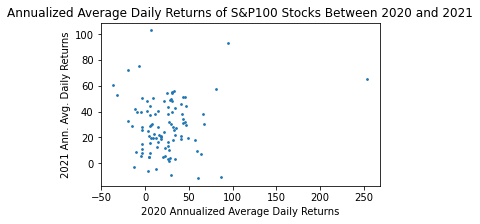

In [18]:
plt.figure(figsize=(5, 3))

plt.scatter(df_annualized_avg_returns_2020, df_annualized_avg_returns_2021, s=3)
plt.title('Annualized Average Daily Returns of S&P100 Stocks Between 2020 and 2021')
plt.xlabel('2020 Annualized Average Daily Returns')
plt.ylabel('2021 Ann. Avg. Daily Returns')
plt.show()

In [19]:
df_annualized_avg_returns_2020.corr(df_annualized_avg_returns_2021)

0.1038

The annualized average daily return of the S&P100 had a small correlation between 2020 and 2021. Therefore the annualized average return of 2020 would not be a good prediction of 2021. We should consider however that 2020 was highly impacted by Covid-19, therefore using this method for different years might have a higher correlation. 

# How well do annualized standard deviations of returns in 2020 predict those in 2021?

Annualize the standard deviation of daily returns by multiplying by the square root of 252.

In [20]:
# calculates standard deviations of each stock only from the year 2020
df_std_dev_2020 = df_daily_returns.loc[:'2020-12-31'].std()

# calculate the annualized standard deviations of returns from 2020
df_annualized_std_2020 = df_std_dev_2020 * np.sqrt(252)
df_annualized_std_2020 

AAPL   46.6870
ABBV   34.9066
ABT    39.2248
ACN    41.7559
ADBE   48.0006
         ...  
VZ     24.5446
WBA    48.5670
WFC    61.2549
WMT    31.5348
XOM    52.8143
Length: 101, dtype: float64

In [21]:
# calculates standard deviations of each stock only from the year 2020
df_std_dev_2021 = df_daily_returns.loc['2021-01-01':'2021-12-31'].std()

# calculate the annualized standard deviations of returns from 2020
df_annualized_std_2021 = df_std_dev_2021 * np.sqrt(252)
df_annualized_std_2021 

AAPL   25.0768
ABBV   20.0518
ABT    21.2302
ACN    19.7285
ADBE   29.1837
         ...  
VZ     14.3013
WBA    27.4904
WFC    34.0521
WMT    16.6363
XOM    29.6806
Length: 101, dtype: float64

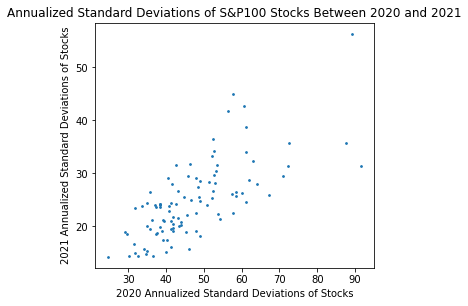

In [22]:
plt.figure(figsize=(5, 4.5))

plt.scatter(df_annualized_std_2020, df_annualized_std_2021, s=3)
plt.title('Annualized Standard Deviations of S&P100 Stocks Between 2020 and 2021')
plt.xlabel('2020 Annualized Standard Deviations of Stocks')
plt.ylabel('2021 Annualized Standard Deviations of Stocks')

plt.show()

In [23]:
df_std_dev_2020.corr(df_std_dev_2021)

0.7142

The annualized standard deviation of the S&P 100 had a fairly strong correlation between 2020 and 2021. Annualized standard deviation of 2020 would therefore be a fairly good prediction for those of 2021. 

# What are the mean, median, minimum, and maximum pairwise correlations between two stocks?
Discuss and explain any outliers.

In [24]:
corr_matrix= df_avg_returns_2021.corr()
correlation= corr_matrix.stack().reset_index()
corr_list =np.triu(corr_matrix,k=1)
corr_list[corr_list==0]=np.nan
    
print("Mean pairwise correlation:", np.nanmean (corr_list))
print("Median pairwise correlation:", np.nanmedian (corr_list))
print("Maximum pairwise correlation:", np.nanmax(corr_list))
print("Minimum pairwise correlation:", np.nanmin(corr_list))

Mean pairwise correlation: 0.2441592422297547
Median pairwise correlation: 0.23164808831093747
Maximum pairwise correlation: 0.9776557461442278
Minimum pairwise correlation: -0.2141355356900979


In [25]:
corr_list

array([[    nan,  0.2024,  0.2103, ...,  0.0849,  0.2622,  0.0642],
       [    nan,     nan,  0.24  , ...,  0.2411,  0.2598,  0.2737],
       [    nan,     nan,     nan, ..., -0.0743,  0.161 , -0.0956],
       ...,
       [    nan,     nan,     nan, ...,     nan,  0.1933,  0.579 ],
       [    nan,     nan,     nan, ...,     nan,     nan,  0.1536],
       [    nan,     nan,     nan, ...,     nan,     nan,     nan]])

In [26]:
min_pair_corr= df_avg_returns_2021.corr().unstack().sort_values()
print(min_pair_corr)
max_pair_corr= df_avg_returns_2021.corr().unstack().sort_values()
print(max_pair_corr)

VZ    ADBE   -0.2141
ADBE  VZ     -0.2141
XOM   TMO    -0.1992
TMO   XOM    -0.1992
ADBE  T      -0.1963
               ...  
NFLX  NFLX    1.0000
NKE   NKE     1.0000
NVDA  NVDA    1.0000
PEP   PEP     1.0000
XOM   XOM     1.0000
Length: 10201, dtype: float64
VZ    ADBE   -0.2141
ADBE  VZ     -0.2141
XOM   TMO    -0.1992
TMO   XOM    -0.1992
ADBE  T      -0.1963
               ...  
NFLX  NFLX    1.0000
NKE   NKE     1.0000
NVDA  NVDA    1.0000
PEP   PEP     1.0000
XOM   XOM     1.0000
Length: 10201, dtype: float64


# Plot annualized average returns versus annualized standard deviations of returns.

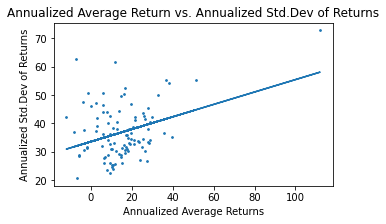

0.3494

In [27]:
df_annualized_avg_returns = df_daily_returns.mean() * 252
df_standard_dev = df_daily_returns.std() * np.sqrt(252)

plt.figure(figsize=(5, 3))
plt.scatter(df_annualized_avg_returns, df_standard_dev, s=3)
plt.xlabel('Annualized Average Returns')
plt.ylabel('Annualized Std.Dev of Returns')
plt.title('Annualized Average Return vs. Annualized Std.Dev of Returns')

m, b = np.polyfit(df_annualized_avg_returns, df_standard_dev, 1)
plt.plot(df_annualized_avg_returns, m*df_annualized_avg_returns+b)
plt.show()

df_annualized_avg_returns.corr(df_standard_dev)


In [28]:
df_annualized_avg_returns.drop('TSLA')

AAPL   35.6191
ABBV   24.0912
ABT    12.2955
ACN    19.1313
ADBE   12.5777
         ...  
VZ     -6.8237
WBA    -8.3425
WFC     6.0726
WMT     9.1359
XOM    26.4388
Length: 100, dtype: float64

In [29]:
m, b = np.polyfit(df_annualized_avg_returns.drop('TSLA'), df_standard_dev.drop('TSLA'), 1)


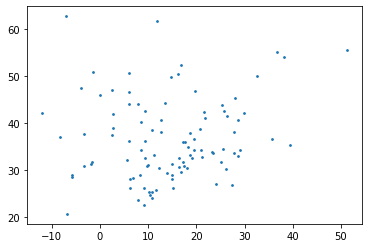

In [30]:
plt.scatter(df_annualized_avg_returns.drop('TSLA'), df_standard_dev.drop('TSLA'), s=3)


## Analysis/Discussion of Results and Outliers
The total annualized returns when compared to their respective standard deviations are weakly positively correlated. The coefficient is .349 making it on the higher end of the weak range for correlation. This does not provide any conclusive data since the weak correlation provides only a minor trend and nothing substantial. If we are to contribute the correlation to any factor, looking at the industries for each company can provide insight. Inside the S&P 100, the industry breakdown is weighted towards technology, pharmaceuticals, and financial companies. Intra-industry comparables can marginally account for the such correlation. 


# Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.
For simplicity, use equal-weighted portfolios and re-balance daily. These portfolio returns are df.mean(axis=1) if data frame df contains columns of daily returns. The .sample() method can randomly sample columns to create random portfolios.

In [31]:
# input `size` must be 2, 5, 10, or 25 to yield results desired
def get_portfolio(size):
    return df_daily_returns.sample(size, axis=1)

In [32]:
def get_mean(size):
    return get_portfolio(size).mean(axis=1)

In [33]:
def get_std(size):
    return get_portfolio(size).std(axis=1)

In [34]:
# input `size` must be 2, 5, 10, or 25 to yield results desired
def get_portfolio_avg_returns(size):

    # create empty df to store values
    avg_returns = list()
    xlabel = list()

    for i in range(1, 101):
        avg_returns.append(get_mean(size))
        xlabel.append(f'Portfolio {i}')
    
    df = pd.DataFrame(avg_returns).transpose()
    df.columns = xlabel
    
    return df

In [35]:
# input `size` must be 2, 5, 10, or 25 to yield results desired
def get_portfolio_std(size):

    # create empty df to store values
    avg_returns = list()
    xlabel = list()

    for i in range(1, 101):
        avg_returns.append(get_std(size))
        xlabel.append(f'Portfolio {i}')
    
    df = pd.DataFrame(avg_returns).transpose()
    df.columns = xlabel
    
    return df

In [36]:
size_two_returns = get_portfolio_avg_returns(2)
size_five_returns = get_portfolio_avg_returns(5)
size_ten_returns = get_portfolio_avg_returns(10)
size_twentyfive_returns = get_portfolio_avg_returns(25)
size_two_std = get_portfolio_std(2)
size_five_std = get_portfolio_std(5)
size_ten_std = get_portfolio_std(10)
size_twentyfive_std = get_portfolio_std(25)

Text(0.5, 1.0, 'Axis [0, 0]')

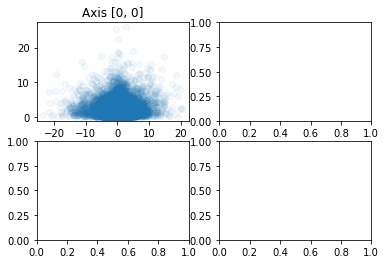

In [37]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(size_two_returns, size_two_std, alpha=0.05)
axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 1].scatter(size_five_returns, size_five_std, 'tab:orange', alpha=0.05)
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].scatter(size_ten_returns, size_ten_std, 'tab:green', alpha=0.05)
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].scatter(size_twentyfive_returns, size_twentyfive_std, 'tab:red',alpha=0.05)
#axs[1, 1].set_title('Axis [1, 1]')

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()